# Part I - (Dataset Exploration Title)
## by (Oyebode Habeeb Omobolaji)

## Introduction

#### This document explores a dataset containing information about individual rides made in a bike sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\elegb\New folder\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bike_data = pd.read_csv(r"C:\Users\elegb\Desktop\fordgobike.csv")

In [3]:
# high-level overview of data shape and composition
print(bike_data.shape)
print(bike_data.dtypes)
print(bike_data.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
#change data type of start_time and end_time to DateTime
bike_data.start_time = pd.to_datetime(bike_data.start_time)
bike_data.end_time = pd.to_datetime(bike_data.end_time)
print(bike_data.start_time.dtypes)
print(bike_data.end_time.dtypes)

datetime64[ns]
datetime64[ns]


In [5]:
# descriptive statistics for numeric variables
print(bike_data.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?

There are 183,412 rows in the dataset and 16 columns (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type,member_birth_year, member_gender, bike_share_for_all_trip)

Most of the data types are int, object and float, moreover neccessary changes have been made.

### What is/are the main feature(s) of interest in your dataset?

All the features interest me with and exception for longitude and latitude.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_station_name column will give us an insight towards which start station is been used the most.

member_gender will lead us to knowing the gender distribution of the company bike users.

user_type will let us know if the company has more customers to subscribers or the other way round.

The rest of the features will also lead to appropriate insights.

## Univariate Exploration


I will start by investigating the gender distribution of the company users. 

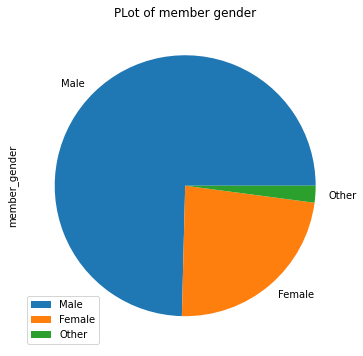

In [31]:
bike_data.member_gender.value_counts().plot(kind = 'pie', figsize = (10,6))
plt.title( 'PLot of member gender')
plt.legend(['Male', 'Female', 'Other'], loc = 'lower left')
plt.show()

The company has more male custmers compared to female customers. moreover some customers didnt identify as either male or female.

Checking for the distribution of duration_sec which is one of our variables of interest.

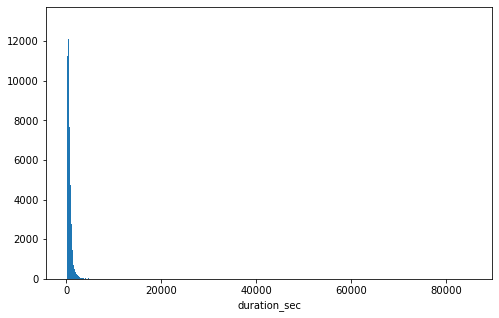

In [16]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(0, bike_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins)
plt.xlabel('duration_sec')
plt.show()

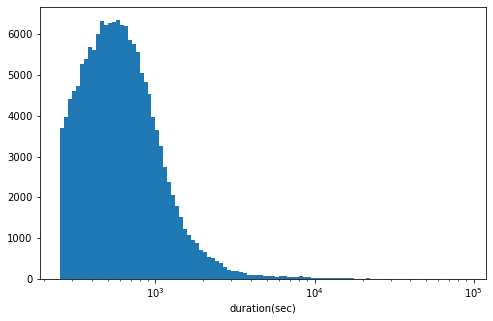

In [17]:
# duration_sec seem tpo be clustered around a specific range of values
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('duration(sec)')
plt.show()

The duration_sec column seem to be clustered around a specific range of values, moreover some part of the data has extremely large values  so i took the log transform of the column then plotted and has its peak around lets say 500 - 600.

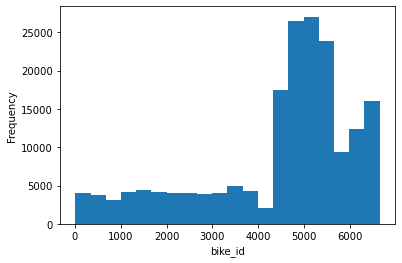

In [18]:
#distribution of bike_id
bike_data.bike_id.plot(kind = 'hist', bins = 20)
plt.xlabel('bike_id')
plt.show()

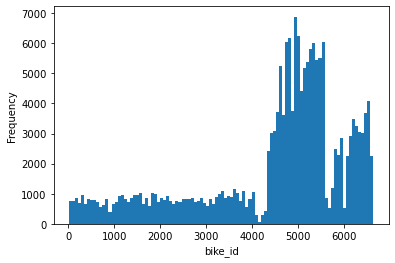

In [22]:
#lets check with smaller bin width
bike_data.bike_id.plot(kind = 'hist', bins = 100)
plt.xlabel('bike_id')
plt.show()

we can now see clearly the distribution of the bike_id

Now time to investigate the most used start station

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
Name: start_station_name, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

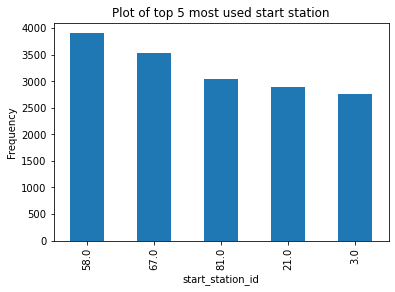

In [25]:
print(bike_data.start_station_name.value_counts().head())
bike_data.start_station_id.value_counts().head().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('start_station_id')
plt.ylabel('Frequency')
plt.title('Plot of top 5 most used start station')
plt.show

We have identified top 5 most used start stations which are:

Market St at 10th St

San Francisco Caltrain Station 2  (Townsend St at 4th St)    

Berry St at 4th St                                           

Montgomery St BART Station (Market St at 2nd St)             

Powell St BART Station (Market St at 4th St)

16th St Depot                     2
21st Ave at International Blvd    4
Palm St at Willow St              4
Parker Ave at McAllister St       7
Willow St at Vine St              9
Name: start_station_name, dtype: int64


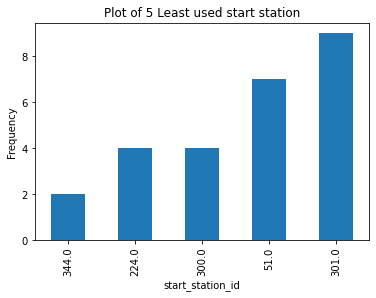

In [26]:
#Least used start stations
new = bike_data.start_station_name.value_counts().sort_values(ascending = True)
print(new.head())
neww = new = bike_data.start_station_id.value_counts().sort_values(ascending = True)
neww.head().plot(kind = 'bar')
plt.xlabel('start_station_id')
plt.ylabel('Frequency')
plt.title('Plot of 5 Least used start station')
plt.show()

We also identified the least used start_stations which are:

16th St Depot                     

Palm St at Willow St              

21st Ave at International Blvd    

Parker Ave at McAllister St       

Willow St at Vine St

The company should make more awareness around these areas to improve boarding around these areas.

Lets check for the most common destination

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
Name: end_station_name, dtype: int64


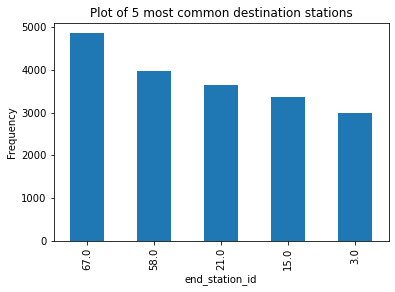

In [27]:
# most common destination
print(bike_data.end_station_name.value_counts().head())
bike_data.end_station_id.value_counts().head().plot(kind = 'bar')
plt.xlabel('end_station_id')
plt.ylabel('Frequency')
plt.title('Plot of 5 most common destination stations')
plt.show()

we have been able to identify the top 5 most common arrival destinations amongst our users which are:

San Francisco Caltrain Station 2  (Townsend St at 4th St)    

Market St at 10th St                                        

Montgomery St BART Station (Market St at 2nd St)             

San Francisco Ferry Building (Harry Bridges Plaza)           

San Francisco Caltrain (Townsend St at 4th St) 

Lets check for the pie chart of user type

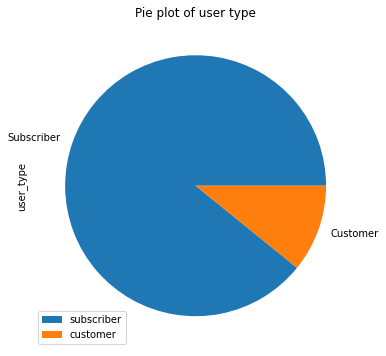

In [32]:
bike_data.user_type.value_counts().plot(kind = 'pie', figsize = (10,6))
plt.title('Pie plot of user type')
plt.legend(['subscriber', 'customer'], loc = 'lower left')
plt.show()

Most of our users are subscribers which i think is a kudos to the team but more effort needs to be done to draw our little percentage of customers to become subscribers.

How well do users share bikes for all trips?

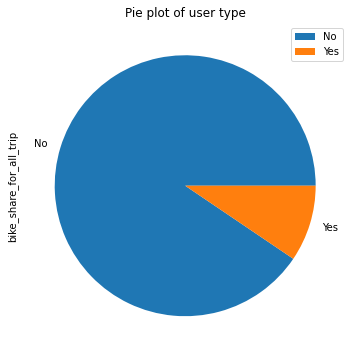

In [33]:
bike_data.bike_share_for_all_trip.value_counts().plot(kind = 'pie', figsize = (10,6))
plt.title('Pie plot of user type')
plt.legend(['No', 'Yes'])
plt.show()

A larger percentage of users didnt share bike for all trips.

Around which year was most of our users born?

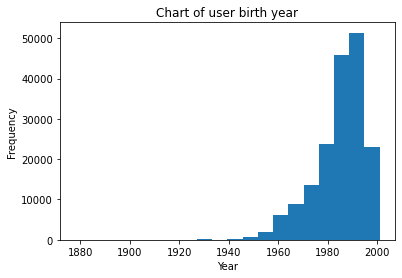

In [34]:
bike_data.member_birth_year.plot(kind = 'hist', bins = 20)
plt.title('Chart of user birth year')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.show()

The modal birth year of users around the year 1990.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the duration_Sec variable the data was clustered around a particular range of values which the histogram was hard to interprete and moreover some part of the data has extremely large values  so i took the log transform of the column then plotted and has its peak around lets say 500 - 600.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Given start_time and end_time, the data types were incorrect so i had tp change the datatype imto a datetime data type whcih suits the features.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Lets consider how user type influenced the average length of travel(duration_sec)

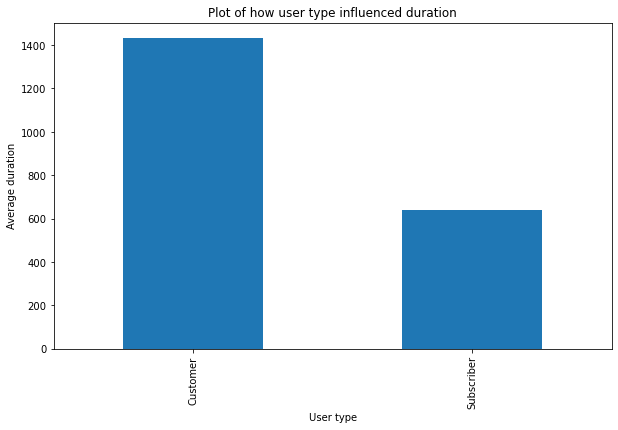

In [35]:
bike_data.groupby("user_type")["duration_sec"].mean().plot(kind = "bar",figsize = (10,6))
plt.title('Plot of how user type influenced duration')
plt.xlabel('User type')
plt.ylabel('Average duration')
plt.show()

Maybe due to the imabalance between the count of customers and subscrubers, customers ride farther than subscribers on average.

Lets check how member gender influenced user type

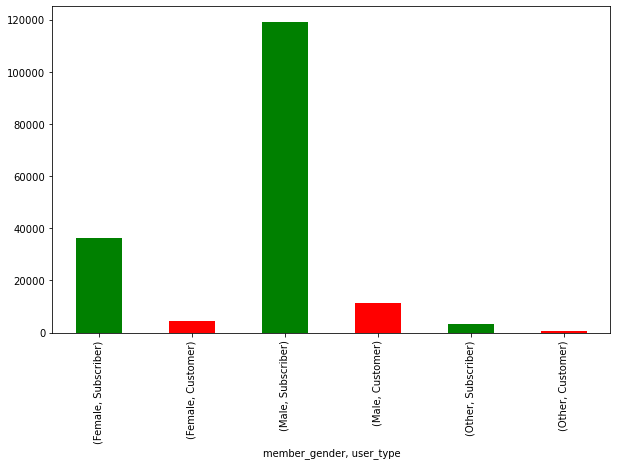

In [36]:
bike_data.groupby("member_gender")["user_type"].value_counts().plot(kind = "bar", color = ['green', 'red'],figsize = (10,6))
plt.xlabel('member_gender, user_type')
plt.show()

There is a huge difference in terms of count between Male and female subscribers.

Checking how member gender influenced average duration.

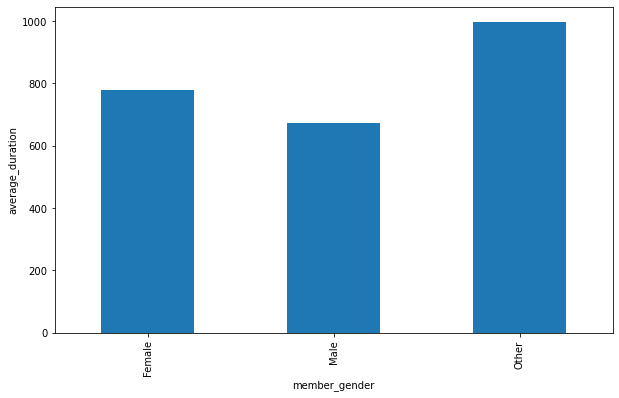

In [38]:
bike_data.groupby("member_gender")["duration_sec"].mean().plot(kind = "bar",figsize = (10,6))
plt.xlabel('member_gender')
plt.ylabel('average_duration')
plt.show()

shockingly, those that identified as other has an average bike ride duration of 1000 sec followed by the females with about 750 sec while the male has ann average bike ride duration of about 700sec.

Investigating how bike_sharing for trips influenced average duration.

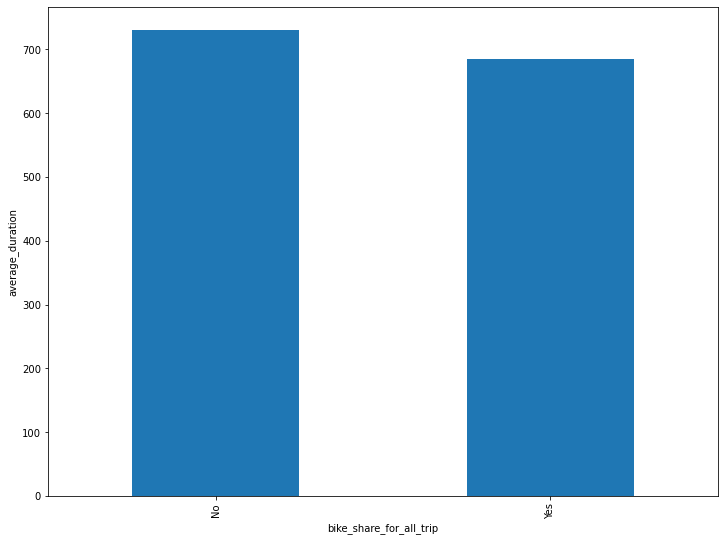

In [39]:
bike_data.groupby("bike_share_for_all_trip")["duration_sec"].mean().plot(kind = "bar",figsize = (12,9))
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('average_duration')
plt.show()

Users that didnt shared bike for all trip has a slightly higher duration in sec at average compared to those that shared.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Feature of interest being duration_sec was plotted against some of the columns to generate insights, there were no standard metric tpo jusstify that a variable actually caused duration_sec to increase or decreas on an average, but non the less through our findings we got to understand that there is a differnce on an average of  how gender, bike_share_for_all_trip and user type  relates with duration_sec.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For example, considering how member gender relates with user type , we got to understand there is a huge difference in terms of count between Male and female subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Lets consider features member_gender, user_type and how they relate with duration_sec on an average.

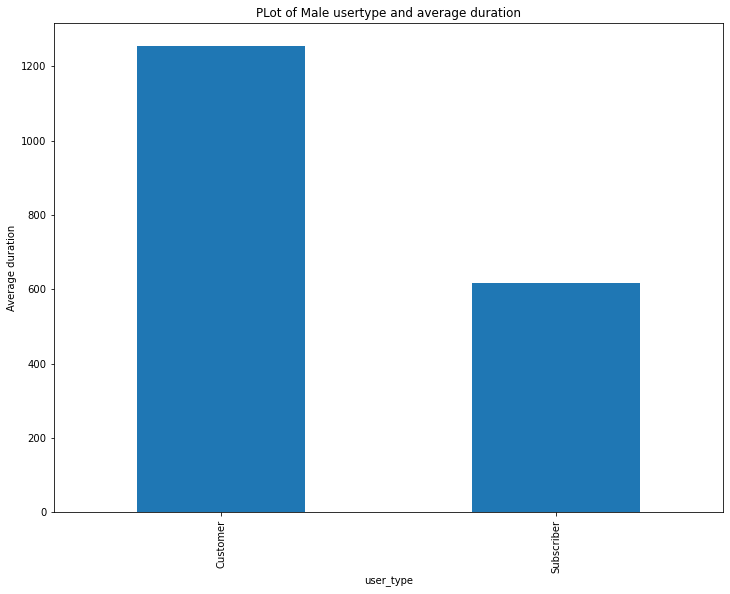

In [41]:
#First lets condier our member_gender to be male 
Male = bike_data[bike_data.member_gender == 'Male']
Male.groupby("user_type")['duration_sec'].mean().plot(kind = "bar",figsize = (12,9))
plt.title('PLot of Male usertype and average duration')
plt.ylabel('Average duration')
plt.show()

After investigating member_gender Male in relations to thier user type and thier average riding duration, we got to understand Men that are customers ride for a longer time period on an average when compared to subscribers.

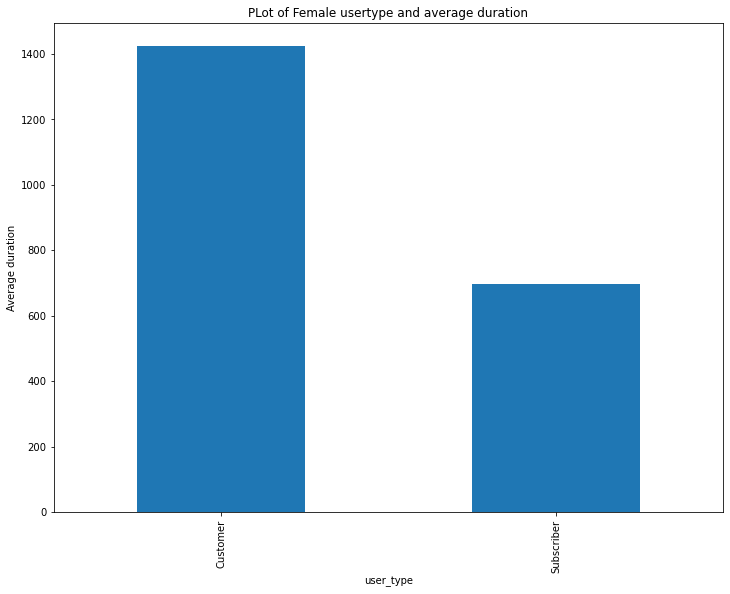

In [42]:
#First lets condier our member_gender to be Female 
Male = bike_data[bike_data.member_gender == 'Female']
Male.groupby("user_type")['duration_sec'].mean().plot(kind = "bar",figsize = (12,9))
plt.title('PLot of Female usertype and average duration')
plt.ylabel('Average duration')
plt.show()

After investigating member_gender Female in relations to thier user type and thier average riding duration, we got to understand Females that are customers ride for a longer time period on an average when compared to subscribers.

Lets consider features bike_share for all trip user_type and how they relate with duration_sec on an average

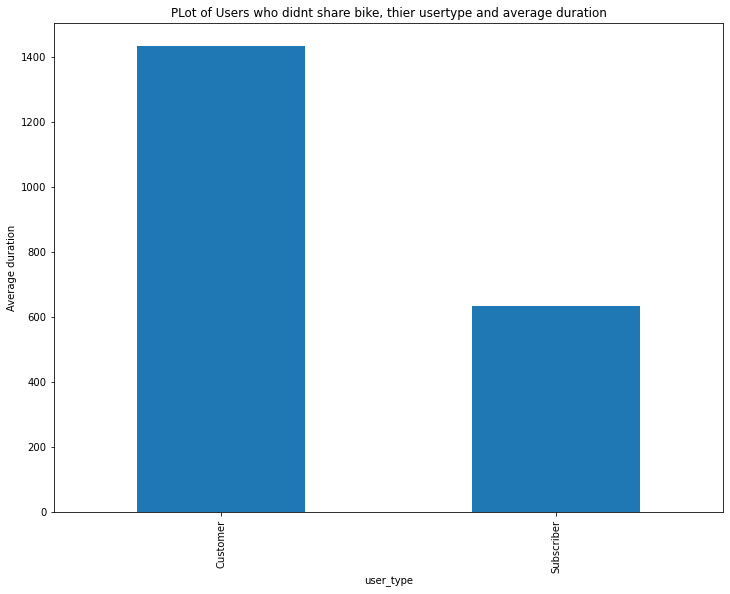

In [43]:
#First lets consider users that didnt share bike 
No = bike_data[bike_data.bike_share_for_all_trip == 'No']
No.groupby("user_type")['duration_sec'].mean().plot(kind = "bar",figsize = (12,9))
plt.title('PLot of Users who didnt share bike, thier usertype and average duration')
plt.ylabel('Average duration')
plt.show()

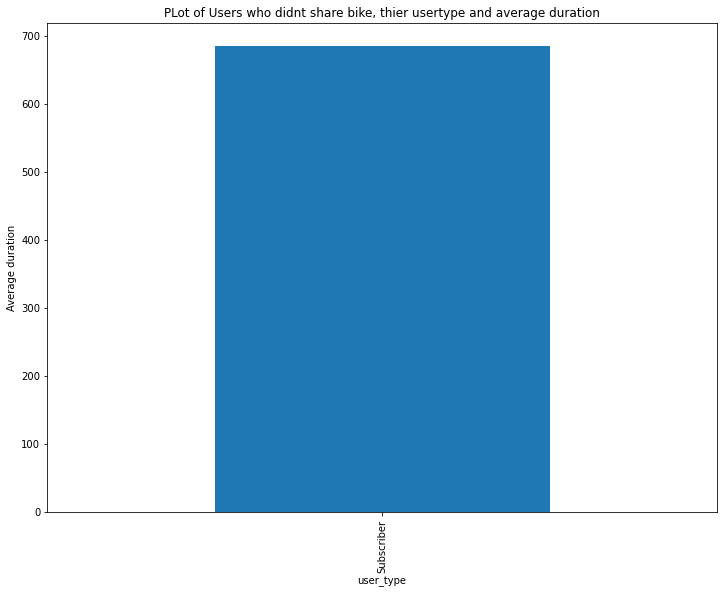

In [44]:
#First lets consider users that did share bike 
Yes = bike_data[bike_data.bike_share_for_all_trip == 'Yes']
Yes.groupby("user_type")['duration_sec'].mean().plot(kind = "bar",figsize = (12,9))
plt.title('PLot of Users who did share bike, thier usertype and average duration')
plt.ylabel('Average duration')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> One thing i get to understand is that users who are customers on an average, no matter the variables studied alongside generally have more riding time(duration) than the subscribers which i am guessing is as a result of imbalance im the ratio of customers to subscribers.

### Were there any interesting or surprising interactions between features?

> Something interesting or rather suprising i got to discover from exploring the dataset is that there is no user who is a customer that did shared a bike. or one thing i might think of is probably its in the companys policy for user type customers not allowed to share a ride.

## Conclusions
The dataset contains information about individual rides made in a bike sharing system covering the greater San Francisco Bay area.

First i did was to of course load the dataset, then view some of its components like df.head(), df.describe() and the likes.

I then went to generate insights from the dataset, by doing so visualising our dataset in 3 categories, i.e Univariate category(which involves just plotting one individual feature), Bivariate(Which involves plotting pair of features) and lastly multivariate category(Which involves plotting more than 3 features)

Results of each findings through visualisations are stated as Markdowns under each visuals.

